In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve

In [2]:
import matplotlib as mpl
# Default parameters for matplotlib plots
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.facecolor'] = (0.9,0.9,0.9)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'w'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 22

In [3]:
file_errors_location = r'C:\Users\16303\Documents\Semester 1\Data Analytics\HW2\WHQ.xlsx'
df = pd.read_excel(file_errors_location)

In [4]:
df.head()

,Country name,Year,Happiness Scale,Happiness Index,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Democratic Quality
0,Afghanistan,2017,Low,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.261179,-1.886566
1,Central African Republic,2016,Low,2.693061,6.465948,0.290184,44.900002,0.624057,0.053440,0.859073,0.748755,-1.437883
2,Afghanistan,2018,Low,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.364666,NaN
3,Liberia,2015,Low,2.701591,6.665998,0.637666,53.700001,0.671431,-0.014139,0.902673,0.472788,-0.519526
4,South Sudan,2017,Low,2.816622,NaN,0.556823,51.000000,0.456011,NaN,0.761270,0.461551,-2.138769


In [5]:
df.dtypes

Country name                          object
Year                                   int64
Happiness Scale                       object
Happiness Index                      float64
Log GDP per capita                   float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Confidence in national government    float64
Democratic Quality                   float64
dtype: object

In [6]:
df.describe()

,Year,Happiness Index,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Democratic Quality
count,713.000000,713.000000,691.000000,708.000000,698.000000,700.000000,683.000000,665.000000,650.000000,574.000000
mean,2015.980365,5.430399,9.269759,0.806259,63.974330,0.762393,-0.000038,0.736471,0.485140,-0.130397
std,1.409102,1.129484,1.192277,0.120856,7.107208,0.131959,0.161227,0.187673,0.196875,0.895390
min,2014.000000,2.661718,6.465948,0.290184,44.900002,0.303540,-0.336385,0.047311,0.079710,-2.448228
25%,2015.000000,4.582098,8.370894,0.740679,58.525000,0.676344,-0.119653,0.682109,0.325991,-0.738313
50%,2016.000000,5.409289,9.481353,0.829752,65.800003,0.780089,-0.023462,0.796859,0.465186,-0.177573
75%,2017.000000,6.236287,10.218923,0.904064,68.650003,0.866713,0.096186,0.860600,0.621997,0.648113
max,2018.000000,7.858107,11.693157,0.987343,76.800003,0.985178,0.677743,0.976340,0.993604,1.575009


In [7]:
df.tail()

,Country name,Year,Happiness Scale,Happiness Index,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Democratic Quality
708,Norway,2015,High,7.603434,11.066768,0.946834,72.900002,0.947621,0.238337,0.298814,0.586872,1.424759
709,Denmark,2018,High,7.648786,10.755594,0.958219,72.400002,0.935438,0.015593,0.150607,0.632478,NaN
710,Finland,2016,High,7.659843,10.588078,0.953940,71.699997,0.948372,-0.030627,0.249660,0.485727,1.265372
711,Finland,2017,High,7.788252,10.611172,0.963826,71.800003,0.962199,-0.005696,0.192413,0.597539,1.311007
712,Finland,2018,High,7.858107,10.636060,0.962155,71.900002,0.937807,-0.131735,0.198605,0.555102,NaN


In [8]:
df = df.drop(['Country name'], axis=1)
df = df.drop(['Happiness Index'], axis=1)
df = df.drop(['Year'],axis=1)

In [9]:
df.head()

,Happiness Scale,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Democratic Quality
0,Low,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.261179,-1.886566
1,Low,6.465948,0.290184,44.900002,0.624057,0.053440,0.859073,0.748755,-1.437883
2,Low,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.364666,NaN
3,Low,6.665998,0.637666,53.700001,0.671431,-0.014139,0.902673,0.472788,-0.519526
4,Low,NaN,0.556823,51.000000,0.456011,NaN,0.761270,0.461551,-2.138769


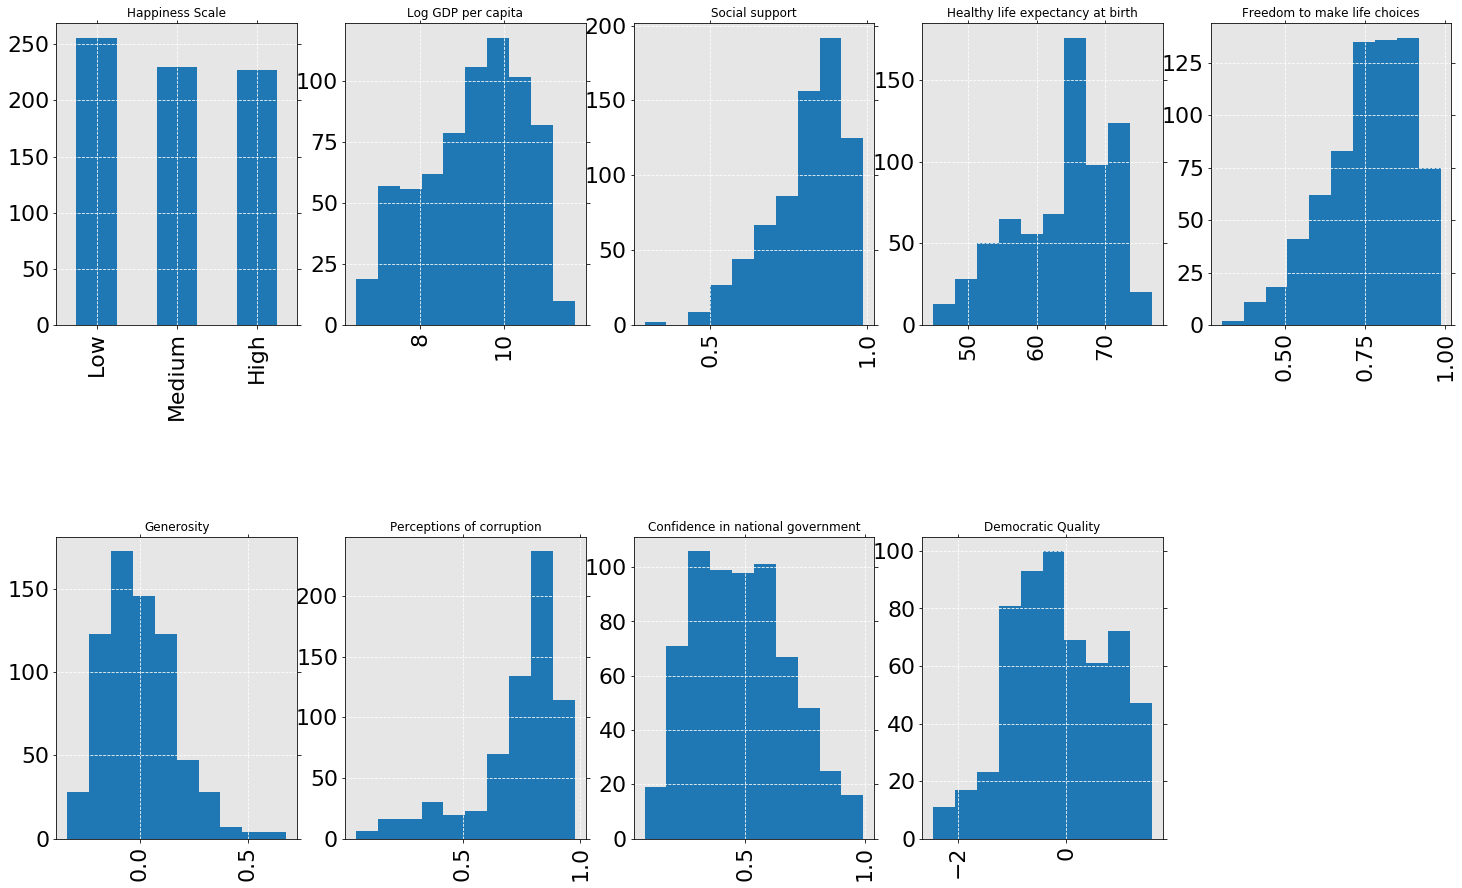

In [10]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [11]:
print(df['Happiness Scale'].unique())

['Low' 'Medium' 'High']


In [12]:
df.loc[df['Happiness Scale']=='Low','Happiness Scale'] = 0
df.loc[df['Happiness Scale']=='Medium','Happiness Scale'] = 1
df.loc[df['Happiness Scale']=='High','Happiness Scale'] = 2

In [13]:
df.dtypes

Happiness Scale                        int64
Log GDP per capita                   float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Confidence in national government    float64
Democratic Quality                   float64
dtype: object

In [14]:
df.head()

,Happiness Scale,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Democratic Quality
0,0,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.261179,-1.886566
1,0,6.465948,0.290184,44.900002,0.624057,0.053440,0.859073,0.748755,-1.437883
2,0,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.364666,NaN
3,0,6.665998,0.637666,53.700001,0.671431,-0.014139,0.902673,0.472788,-0.519526
4,0,NaN,0.556823,51.000000,0.456011,NaN,0.761270,0.461551,-2.138769


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
Happiness Scale                      713 non-null int64
Log GDP per capita                   691 non-null float64
Social support                       708 non-null float64
Healthy life expectancy at birth     698 non-null float64
Freedom to make life choices         700 non-null float64
Generosity                           683 non-null float64
Perceptions of corruption            665 non-null float64
Confidence in national government    650 non-null float64
Democratic Quality                   574 non-null float64
dtypes: float64(8), int64(1)
memory usage: 50.2 KB


In [16]:
df = df.fillna(0)

In [17]:
X = df.drop(['Happiness Scale'], axis=1)
Y = df['Happiness Scale']

In [40]:
from sklearn.model_selection import RepeatedKFold
random_state = 12883823
clf_2=RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state);

In [18]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)

In [42]:
clf_1.fit(X,Y)
#clf_1.predict(X_holdout)
# Number of folds for cross validation
num_folds = 7

In [35]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()

In [36]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='accuracy'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #ax.set_xlim(2,12)
    #ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    #ax.text(9, -0.94, 'Overfitting', fontsize=22)
    #ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()

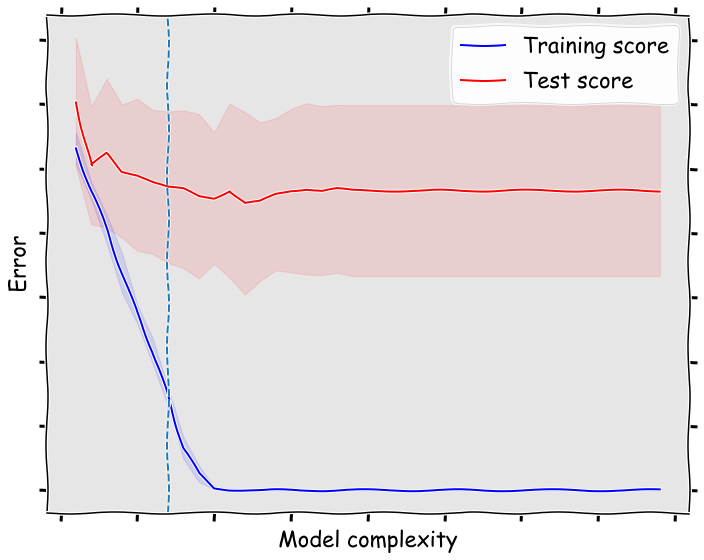

In [44]:
plot_validation_curve(clf_1, X, Y,param_name='max_depth', param_range=range(1,40))

In [ ]:
plot_validation_curve(clf_1, X, Y,param_name='max_depth', param_range=range(1,20))

In [94]:
clf_1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [95]:
clf_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
clf_1.predict(X_holdout)

NameError: name 'X_holdout' is not defined

In [ ]:
from sklearn import metrics

In [ ]:
np.arange(1, 250, 2)

In [ ]:
X.shape

In [ ]:
Y.shape

Automatically created module for IPython interactive environment


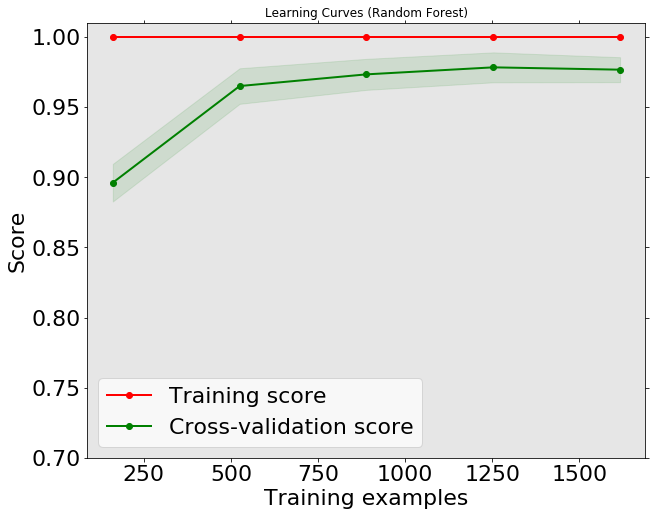

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target
title = r"Learning Curves (Random Forest)"

cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
estimator = clf_1
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [57]:
from sklearn import metrics
# testing score
pred = clf_1.predict(X_test)
pscore = metrics.accuracy_score(y_test, pred)

In [58]:
pscore

1.0

In [59]:
pred_train = clf_1.predict(X_train)

In [62]:
score = metrics.accuracy_score(y_train, pred_train)

In [63]:
score

1.0

In [67]:
base_history = deep_model(base_model, X_train_rest, y_train_rest, X_valid, y_valid)
base_min = optimal_epoch(base_history)
eval_metric(base_model, base_history, 'loss')

NameError: name 'deep_model' is not defined

In [68]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf_1,X,Y,train_sizes = train_sizes, cv = 5)

SyntaxError: positional argument follows keyword argument (<ipython-input-77-10fe239b6fd1>, line 4)